# Bayesian Methods for Hackers - Chapter 04 - Law of Large Numbers

# Example 01 - LoLN

The law of large numbers states that the mean of $N$ independently drawn samples from a distribution will converge to the expected value of that distribution as $N \rightarrow \infty$.

Demonstrating the LoLN for three different sequences of Poisson random variables.

In [2]:
%matplotlib inline
import numpy as np 
from IPython.core.pylabtools import figsize 
import matplotlib.pyplot as plt 

## LoLN For Poisson RV

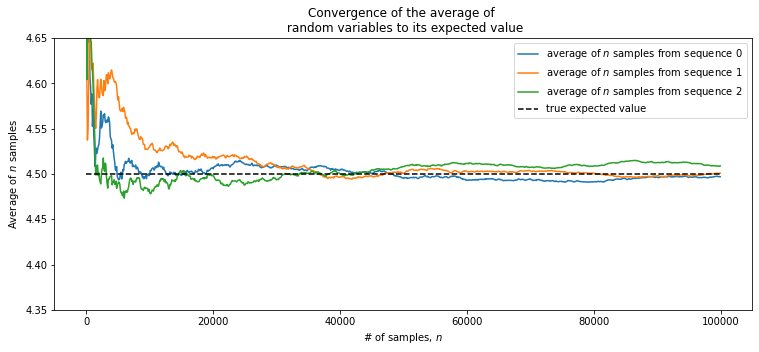

In [3]:
plt.figure(figsize = (12.5, 5))

# Upper bound for sample size - we calculate the expected value of the Poisson
# random variable by averaging over 1, 2, 3, ..., 100k samples from a Poisson
# distribution
sample_size = 100 * (10 ** 3)

# Expected value of a Poisson distribution is the same as the lambda parameter
expected_value = lambda_ = 4.5 

# Instantiate a Poisson random variables
poi = np.random.poisson

# Domain of samples in steps of 100
N_samples = range(1, sample_size, 100)          

# Repeat the process of plotting partial averages of `n` samples thrice for the same lambda
for k in range(3):
  samples = poi(lambda_, sample_size) 
  partial_average = [samples[:i].mean() for i in N_samples]
  plt.plot(N_samples, partial_average, lw = 1.5, label = f'average of $n$ samples from sequence {k}')

# The true expected value of the Poisson distribution - expect all lines to converge to ths
plt.plot(N_samples, expected_value * np.ones_like(partial_average), ls = '--', 
         label = 'true expected value', c = 'k')

plt.ylim(4.35, 4.65)
plt.title('Convergence of the average of \n random variables to its expected value')
plt.ylabel('Average of $n$ samples')
plt.xlabel('# of samples, $n$')
plt.legend()

## Expected Distance from $E[X]$

To answer the question "how quickly do we converge to the expected value", we can plot the distance between the true value and the current expected value at a given number of trials. 

$$D(N) = \sqrt{E[\frac{1}{N}\Sigma_{i = 1}^{N}(Z_i - 4.5)^2]}$$

This is the distance away from the true value (on average) for some $N$. 


Since this is an expected value, it can also be approximated using the LoLN: instead of averaging $Z_i$ we calculate the following multiple times and average the values. 

$$Y_k = \frac{1}{N}[\Sigma_{i = 1}^{N}(Z_i - 45)^2]$$ 

By computing the square root of $N_y$ such values and averaging them, we get to $D(N)$ 

$$\sqrt{\frac{1}{N}\Sigma_{k = 1}{^N}Y_k} \approx D(N)$$

Samples drawn: (1000, 250) | N_Y = 250 | n = 1000
Samples drawn: (6000, 250) | N_Y = 250 | n = 6000
Samples drawn: (11000, 250) | N_Y = 250 | n = 11000
Samples drawn: (16000, 250) | N_Y = 250 | n = 16000
Samples drawn: (21000, 250) | N_Y = 250 | n = 21000
Samples drawn: (26000, 250) | N_Y = 250 | n = 26000
Samples drawn: (31000, 250) | N_Y = 250 | n = 31000
Samples drawn: (36000, 250) | N_Y = 250 | n = 36000
Samples drawn: (41000, 250) | N_Y = 250 | n = 41000
Samples drawn: (46000, 250) | N_Y = 250 | n = 46000


Text(0.5, 1.0, "How 'fast' is the sample average convering?")

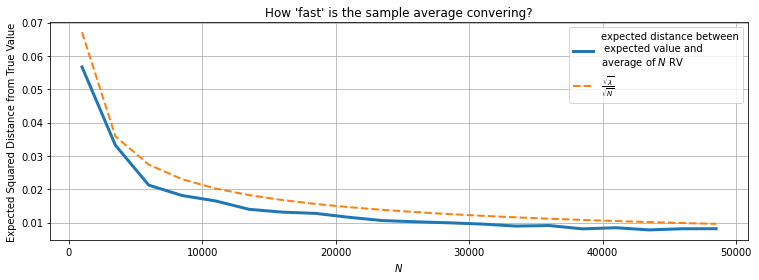

In [4]:
plt.figure(figsize = (12.5, 4))

# For how many values or iterations will we compute the average distance?
N_array = np.arange(1 * (10 ** 3), 50 * (10 ** 3), 2500)

# For each iteration, how many values of the Poisson random variable will we 
# draw to compute the average expected distance from true value?
N_Y = 250         

# Preallocate array for storing results 
expected_value = np.zeros(len(N_array))

lambda_ = 4.5                         # The true expected value 
expected_value = lambda_              # Is the same as the lambda parameter for a Poisson variable
D_N_results = np.zeros(len(N_array))  # Preallocate array to store distance values

def D_N(n):
  """
  This function approximated D_n, the average variance of using `n` samples.
  At each iteration of `n`, we will draw `n` batches of `N_Y` samples. The 
  average of each batch will be an average of the expected value at that number 
  of samples drawn. We average over the difference between these averages and 
  the 'true' value of the expected value.
  """
  Z = poi(lambda_, (n, N_Y))
  if n % 1000 == 0:
    print(f"Samples drawn: {Z.shape} | N_Y = {N_Y} | n = {n}")
  else:
    pass
  avg_Z = Z.mean(axis = 0)
  return np.sqrt((avg_Z - expected_value) ** 2).mean()

for i, n in enumerate(N_array):
  D_N_results[i] = D_N(n)

plt.xlabel('$N$')
plt.ylabel('Expected Squared Distance from True Value')
plt.plot(N_array, D_N_results, lw = 3, 
         label = 'expected distance between\n expected value and \naverage of $N$ RV')
plt.plot(N_array, np.sqrt(expected_value) / np.sqrt(N_array), lw = 2, ls = '--', 
         label = r'$\frac{\sqrt{\lambda}}{\sqrt{N}}$')
plt.legend()
plt.grid()
plt.title("How 'fast' is the sample average convering?")

## Observations
- As the number of samples increases, the expected difference between the true value and the expected value with the number of samples also decreases. 
- The rate of decrease is not linear.
- When a sequence of random variables is distributed as $Z$ is in this example, the LoLN states that the rate of convergence is approximated by $\frac{\sqrt{Var(Z)}}{\sqrt{N}}$ where $Var(Z)$ is the variance of the random variable, and $N$ is the number of samples drawn. 
- In this case, because $Z$ is a Poisson random variable, $\sqrt{Var(Z)}$ = $\sqrt{\lambda}$.
- This is important because for a given $N$ we can tell how far away we are from the 'true' expected value. 

## Computing $Var(Z)$
The variance is also another expected value that can be approximated using the expected value of $Z$. 

$$\frac{1}{N}\Sigma_{i = 1}^{N}(Z_i - \mu)^2 \rightarrow E[(Z - \mu)^2] = Var(Z)$$

## Indicator Function

The indicator function $I_A(x) = 1\ if\ x \in A\ else\ 0$. We can use the indicator function to define a frequentist probability of event A. 

The frequentist definition of a probability of event A is the number of times event A is observed to occur divided by all events observed. 

$$P(A) = \frac{1}{N}\Sigma_{i = 1}^{N}I_A(X_i) \rightarrow E[I_A(X)]$$

Indicator function is 1 only when the event is A, so in essence it shows the relative frequency of event A. 

In [5]:
# Using indicator functions to approximate probabilities 
N = 10 * (10 ** 3)

# This prints the probability of an exponential RV being > 5 
print(np.mean([np.random.exponential(0.5) > 5 for i in range(N)]))

0.0


## Relevance to Bayesian Statistics 
- In Bayesian statistics, we compute point estimates using the Law of Large Numbers.
- Analytical Bayesian inference would require solving complicated multidimensional integrals in the normalizing factor to find the expected value.
- With PyMC3, we can simply sample from the posterior distribution and average over all samples. 
- The LoLN tells us that, given enough samples, the expected value from the posterior will tend to the true expected value of the posterior distribution. 

# Example 02 - Small Sample Sizes and Geographic Data
The LoLN is applicable only when $N \rightarrow \infty$. The following example demonstrates when it is incorrect to apply this law. 

We have a toy dataset that shows the aggregated populations and heights of individuals from 5000 counties. 

We want to find the average hiehgt of individuals per county. But we don't know apriori that the height does **not** vary by county and that, regardless of country, an individual's height is normally distributed. 

$height \sim Normal(150, 15)$

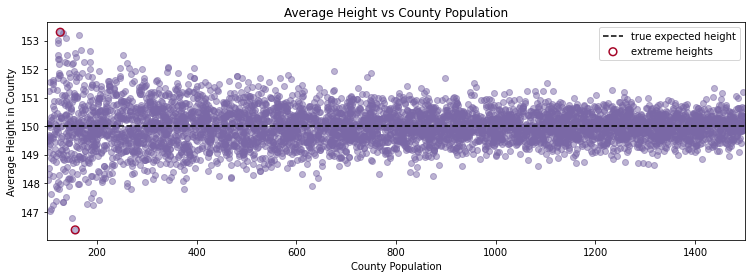

In [6]:
plt.figure(figsize = (12.5, 4))

# We assume we don't know the mean and SD of heights across all counties
std_height = 15
mean_height = 150

# 5000 counties. Populations will be generated as integers. 
n_counties = 5000
pop_generator = np.random.randint

# Normal distribution object to generate heights 
norm = np.random.normal 

# Generate some artifical population numbers 
population = pop_generator(100, 1500, n_counties) 

# Preallocate to store mean height of each simulated county 
average_across_county = np.zeros(n_counties)

for i in range(n_counties):
  # Generate some individuals and take the mean of their heights - mean, sdev, sample size 
  average_across_county[i] = norm(mean_height, std_height, population[i]).mean()

# Locate the counties with the most extreme heights 
idx_min = np.argmin(average_across_county)
idx_max = np.argmax(average_across_county)

plt.scatter(population, average_across_county, alpha = 0.5, c = '#7A68A6')

# Plot the population size vs recorded average for the max and min heights with custom styles
plt.scatter(
    # x-axis values show populations
    [population[idx_min], population[idx_max]],

    # y-axis values show average heights  
    [average_across_county[idx_min], average_across_county[idx_max]], 

    s = 60, marker = 'o', facecolors = 'none', edgecolors = '#A60628', linewidths = 1.5, label = 'extreme heights'
)

plt.xlim(100, 1500)
plt.title('Average Height vs County Population')
plt.xlabel('County Population')
plt.ylabel('Average Height in County')
plt.plot([100, 1500], [150, 150], color = 'k', label = 'true expected height', ls = '--')

plt.legend(scatterpoints = 1)

We can see that the extreme heights - lowest and highest - both occur for counties with really low populations. 

Concluding that these counties truly have the highest and lowest average heights would be a mistake - the sample size for these counties (the number of individuals in the county population) is simply too small to invoke the law of large numbers. 

In truth, the expected average height should be 150 cm. 


As further evidence against the inference of these counties averages being correct, we can recall
- the population numbers in each county were uniformly distributed between 100 and 15000. 
- this means counties with most extreme heights should also have populations that are more or less uniformly distributed over between 100 and 1500. 


In [7]:
print("Population sizes of 10 'tallest' counties")
print(population[np.argsort(-average_across_county)[:10]])

Population sizes of 10 'tallest' counties
[126 131 164 138 122 122 168 185 156 121]


In [8]:
print("Population sizes of 10 'shortest' counties")
print(population[np.argsort(average_across_county)[:10]])

Population sizes of 10 'shortest' counties
[156 149 106 108 192 111 179 131 131 117]


In both cases, the population sizes are not uniformly distributed between 100 and 1500. They're actually concentrated between 100 - 450 for the shortest counties, and 100 - 250 for the tallest counties. 

# Example 03 - Kaggle's US Census Return Rate Challenge

This dataset shows the mailback rate for different city blocks. 

In [9]:
!wget "https://raw.githubusercontent.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/master/Chapter4_TheGreatestTheoremNeverTold/data/census_data.csv"

--2021-02-28 14:33:45--  https://raw.githubusercontent.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/master/Chapter4_TheGreatestTheoremNeverTold/data/census_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 416738 (407K) [text/plain]
Saving to: ‘census_data.csv’

census_data.csv     100%[===================>] 406.97K  --.-KB/s    in 0.04s   

2021-02-28 14:33:45 (9.31 MB/s) - ‘census_data.csv’ saved [416738/416738]



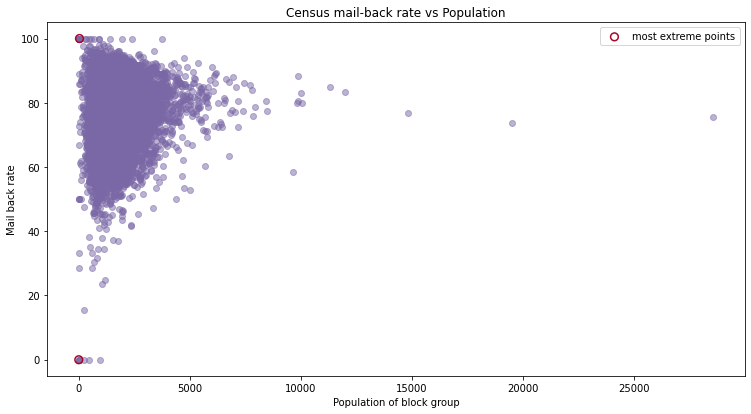

In [10]:
plt.figure(figsize = (12.5, 6.5))

data = np.genfromtxt('./census_data.csv', skip_header = 1, delimiter = ',')
plt.scatter(data[:, 1], data[:, 0], alpha = 0.5, c = '#7A68A6')
plt.title('Census mail-back rate vs Population')
plt.ylabel('Mail back rate')
plt.xlabel('Population of block group')

idx_min = np.argmin(data[:, 0])
idx_max = np.argmax(data[:, 0])

plt.scatter(
    [data[idx_min, 1], data[idx_max, 1]], 
    [data[idx_min, 0], data[idx_max, 0]],
    s = 60, marker = 'o', facecolors = 'none', edgecolors = '#A60628', linewidths = 1.5, 
    label = 'most extreme points'
)

plt.legend(scatterpoints = 1)

The plot above demonstrates the same principle as the simulated data in Example 02 - the highest and lowest raw mailback rates are observed in city blocks with the lowest populations. 

This, in turn, means it would be incorrect to infer that these counties truly have the lowest and highest mailback rates because the sample size is not large enough for the LoLN to be applicable. 

This triangulare shaped graph (where some quantity of interest has a large spread at lower sample sizes and converges to a stable value at higher sample sizes) is a classic example of the LoLN becoming more exact. 

**The conclusion here is that the LoLN is not applicable to small datasets, only to large datasets**. This is why big data problems can be solved rather easily with simple algorithms - large datasets are stable.

# Example 04 - Ordering Reddit Submissions

There are several ways to order Reddit submissions
1. **Popularity**: Posts with a large number of votes/engagements are better. Flaw is that engagements could be good or bad, and a post with 100 upvotes but 500 downvotes, while engaging, might not be the best.
2. **Difference**: Sort by the difference between upvotes and downvotes, with a more positive difference being better. Flaw is that this does not account for traffic over time: a post that was viewed during high traffic hours is likely to have more raw upvotes. 
3. **Time adjusted**: Difference between upvotes and downvotes per unit time. Drawback is that we need to decide on a good value for unit time. This can be a problem because we will end up comparing old submissions (stable) vs new ones (unstable).
4. **Ratio**: Rank submissions by the ratio of upvotes to total votes. Solves most problems in 1 - 3, but a post with only 1 positive vote will be ranked higher than a post with 999 positive votes and 1 downvote.

**Solution - True Upvote Ratio**: The true upvote to downvote ratio which can be interpreted as the probability that someone will give a post an upvote. With a Bayesian approach, we can be very certain about the true ratio for the post with 999 upvotes and 1 downvote, though less certain about the post with only 1 upvote. 

## Prior 
We have to choose a prior for the true underlying upvote to downvote ratio. 

Reasons for choosing a uniform prior
1. **Skewed Data**: Most submissions will have very few votes, and there will be a few submissions with extremely large number of votes. This will skew our distribution for true upvote ratio to the extremes. 
2. **Biaseed Data**: Not all subreddits are similar. There might be more upvotes on one subreddit and fewer on the other, just due to the nature of the subreddit. 

In [11]:
!wget "https://raw.githubusercontent.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/master/Chapter4_TheGreatestTheoremNeverTold/top_showerthoughts_submissions.py"

--2021-02-28 14:33:46--  https://raw.githubusercontent.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/master/Chapter4_TheGreatestTheoremNeverTold/top_showerthoughts_submissions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 831 [text/plain]
Saving to: ‘top_showerthoughts_submissions.py’

top_showerthoughts_ 100%[===================>]     831  --.-KB/s    in 0s      

2021-02-28 14:33:46 (78.1 MB/s) - ‘top_showerthoughts_submissions.py’ saved [831/831]



In [12]:
!pip install praw

     |████████████████████████████████| 163kB 5.3MB/s 
     |████████████████████████████████| 204kB 40.8MB/s 


In [13]:
import sys

import numpy as np
from IPython.core.display import Image

# Python Reddit API Wrapper - we use this to fetch data from Reddit's API using Python code
import praw

In [14]:
# Instantiate a Reddit application connection using the credentials from https://www.reddit.com/prefs/apps
reddit = praw.Reddit(
    client_id="",                  # This is the ID printed under the app's name on prefs
    client_secret="",          # Secret in the apps dashboard
    user_agent="",                # This is the name you've given to your app on the app dashboard
    username="",                    # Reddit username 
    password="",                    # Reddit password 
)

# Instantiate a connection to the showerthoughts subreddit
subreddit  = reddit.subreddit("showerthoughts")

# Generator object of top 100 submissions 
top_submissions = subreddit.top(limit=100, time_filter = 'day')

# A list to hold contents and upvote ratio for each submission in the generator
showerthoughts = {'contents': [], 'upvote_ratio': [], 'upvotes': [], 'downvotes': [], 
                  'total_votes': []}

for submission in top_submissions:
  showerthoughts['contents'].append(submission.title)
  showerthoughts['upvote_ratio'].append(submission.upvote_ratio)
  showerthoughts['upvotes'].append(submission.score)
  downvotes = int((submission.score - submission.score * submission.upvote_ratio) / submission.upvote_ratio)
  showerthoughts['downvotes'].append(downvotes)
  showerthoughts['total_votes'].append(int(submission.score / submission.upvote_ratio))

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [15]:
import pickle as pkl

In [16]:
with open('showerthoughts.pickle', 'wb') as out_file:
    pkl.dump(showerthoughts, out_file, protocol=pkl.HIGHEST_PROTOCOL)

In [17]:
showerthoughts_list = list(
    zip(showerthoughts['contents'], 
        showerthoughts['upvote_ratio'], 
        showerthoughts['upvotes'], 
        showerthoughts['downvotes'],
        showerthoughts['total_votes']))

In [18]:
# Print the contents and upvotes ratio for randomly selected posts
n_submissions = len(showerthoughts['contents'])
selected_submissions = np.random.randint(n_submissions, size = 5)
print(f'Some Submissions (out of {len(showerthoughts_list)})\n-------------------------')
for i in selected_submissions:
  print('"' + showerthoughts_list[i][0] + '"') 
  print("Upvote Ratio: " + str(showerthoughts_list[i][1]))
  print(f'Total Votes: {showerthoughts_list[i][4]} | Upvotes : {showerthoughts_list[i][2]} | Downvotes: {showerthoughts_list[i][3]}')

Some Submissions (out of 100)
-------------------------
"All tattoos are eventually temporary."
Upvote Ratio: 0.79
Total Votes: 17 | Upvotes : 14 | Downvotes: 3
"The irony of irony is you can’t understand irony until you understand irony."
Upvote Ratio: 0.87
Total Votes: 126 | Upvotes : 110 | Downvotes: 16
"Vitamin water taste like its been sitting in a water gun"
Upvote Ratio: 0.83
Total Votes: 60 | Upvotes : 50 | Downvotes: 10
"Most Conspiracy theories probably started as satire until some idiot took it seriously."
Upvote Ratio: 0.96
Total Votes: 158 | Upvotes : 152 | Downvotes: 6
"There's like a 7-billion-way tie for people who hold the fewest world records."
Upvote Ratio: 0.97
Total Votes: 2618 | Upvotes : 2540 | Downvotes: 78


## Modeling

Assume the true upvote ratio for a post $p$. 
Assume the total number of votes on the same post is $N$. 
This means the number of upvotes will look like a binomial random variable with parameters $p$ and $N$. 
With a uniform prior for the true upvote ratio for all posts, we can now perform Bayesian modeling.

In [19]:
import pymc3 as pm

In [20]:
def posterior_upvote_ratio(upvotes, downvotes, samples = 20 * (10 ** 3)):
  """
  This function accepts the number of upvotes and downvotes that a particular submission received. 
  It also accepts the number of posterior samples to return to the user.
  Assumes a uniform prior
  """
  # The total number of votes is obviously the sum of upvotes and downvotes
  N = upvotes + downvotes 

  # We instantiate a PyMC3 model where...
  with pm.Model() as model:
    # The prior for the upvote_ratio is uniform between 0 and 1
    upvote_ratio = pm.Uniform('upvote_ratio', 0, 1)

    # Assuming `p` as the probability of upvotes and `observed` as the actual 
    # upvotes 
    observations = pm.Binomial('obs', N, upvote_ratio, observed = upvotes)

    # Sample the posterior created by multiplying a uniform prior with Binomial likelihood
    trace = pm.sample(samples, step = pm.Metropolis())

  # Burned trace is the trace after removing first 25% of samples - assuming these 
  # were samples taken before the typical set
  burned_trace = trace[int(samples / 4):]

  # We're only interested in the trace of the upvote ratio
  return burned_trace['upvote_ratio']

('All tattoos are eventually temporary.', 0.79, 14, 3, 17)


Sequential sampling (2 chains in 1 job)
Metropolis: [upvote_ratio]
100%|██████████| 20500/20500 [00:02<00:00, 10132.71it/s]
The number of effective samples is smaller than 25% for some parameters.


('The irony of irony is you can’t understand irony until you understand irony.', 0.87, 110, 16, 126)


Sequential sampling (2 chains in 1 job)
Metropolis: [upvote_ratio]
100%|██████████| 20500/20500 [00:02<00:00, 7193.04it/s]
The number of effective samples is smaller than 25% for some parameters.


('Vitamin water taste like its been sitting in a water gun', 0.83, 50, 10, 60)


Sequential sampling (2 chains in 1 job)
Metropolis: [upvote_ratio]
100%|██████████| 20500/20500 [00:02<00:00, 7894.35it/s]
The number of effective samples is smaller than 25% for some parameters.


('Most Conspiracy theories probably started as satire until some idiot took it seriously.', 0.96, 152, 6, 158)


Sequential sampling (2 chains in 1 job)
Metropolis: [upvote_ratio]
100%|██████████| 20500/20500 [00:02<00:00, 7750.08it/s]
The number of effective samples is smaller than 25% for some parameters.


("There's like a 7-billion-way tie for people who hold the fewest world records.", 0.97, 2540, 78, 2618)


Sequential sampling (2 chains in 1 job)
Metropolis: [upvote_ratio]
100%|██████████| 20500/20500 [00:02<00:00, 8643.72it/s]
The number of effective samples is smaller than 25% for some parameters.


Text(0.5, 1.0, 'Posterior Distributions of upvote ratios on different submissions')

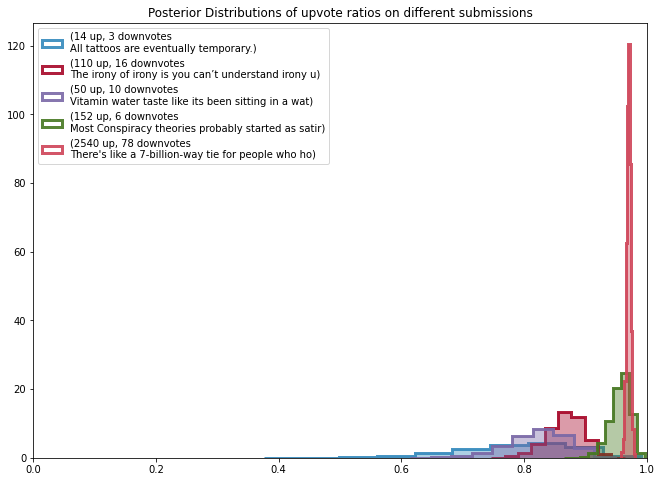

In [21]:
plt.figure(figsize = (11, 8))

# A list to store the posterior samples 
posteriors = [] 

# A separate color for each submission's posterior
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#CF4457']

# For the 4 randomly selected submissions from the previous code
for (count, idx) in enumerate(selected_submissions):
  # Find the tuple corresponding to the submission
  sub = showerthoughts_list[idx]
  print(sub)

  # Index the tuple to find the information we need for PyMC3
  content, upvotes, downvotes = sub[0], sub[2], sub[3]

  # Get 20k samples from the posterior 
  posteriors.append(posterior_upvote_ratio(upvotes, downvotes))
  
  # Outline of the histogram of the posterior distribution of the true upvote ratio
  plt.hist(
      posteriors[count], bins = 10, density = True, alpha = 0.9, histtype = 'step', 
      color = colors[count % 5], lw = 3, 
      label = f"({upvotes} up, {downvotes} downvotes\n{content[:50]})"
  )

  # Fill the histogram of the posterior distribution of the true upvote ratio
  plt.hist(
            posteriors[count], bins = 10, density = True, alpha = 0.4, histtype = 'stepfilled', 
      color = colors[count % 5], lw = 3
  )

plt.legend(loc = 'upper left')
plt.xlim(0, 1)
plt.title('Posterior Distributions of upvote ratios on different submissions')

### Observations 
- The narrower the distribution, the more certain we are about its true upvote ratio based on Bayesian regression.
- Intuitively, we are more certain about comment number 5 with the most upvotes and fewest downvotes and the highest number of total votes.

## Sorting 

Our ultimate goal was to sort Reddit posts by their "true" upvote to downvote ratio. 

We could use the mean to sort the submissions, but this is a bad idea because it completely foregoes the uncertainty in the true estimate that we have worked so hard to attain via Bayesian regression. 

The solution here is to use the lower bound of the 95% credible intervals for the posterior distributions: this is called the **95% least plausible value**.

In [22]:
posteriors

[array([0.75634131, 0.72285288, 0.71714473, ..., 0.76233337, 0.76233337,
        0.90215755]),
 array([0.86363425, 0.86363425, 0.86532266, ..., 0.88799088, 0.88799088,
        0.88799088]),
 array([0.86127737, 0.76715102, 0.76715102, ..., 0.81640099, 0.81640099,
        0.81640099]),
 array([0.96924363, 0.9406015 , 0.93927113, ..., 0.92654578, 0.92654578,
        0.96573204]),
 array([0.97076912, 0.97076912, 0.97076912, ..., 0.96373013, 0.96432772,
        0.96432772])]

[4 3 1 2 0] [0.6231806019759188, 0.8163025036789318, 0.7380019017605142, 0.9260379107060644, 0.9645768469216667]


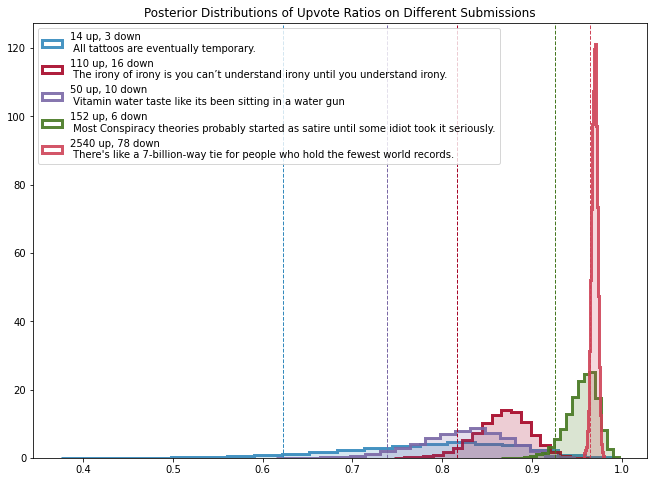

In [33]:
plt.figure(figsize = (11, 8))

# N represents the number of submissions for which we've sampled the posterior for true upvote ratio
N = posteriors[0].shape[0]
lower_limits = []

# A separate color for each submission's posterior
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#CF4457']

# Plot a histogram for 
for (count, idx) in enumerate(selected_submissions):
  sub = showerthoughts_list[idx]
  content, upvotes, downvotes = sub[0], sub[2], sub[3]

  plt.hist(
      posteriors[count], bins = 20, density = True, alpha = 0.9, histtype = 'step', 
      color = colors[count], lw = 3,
      label = f"{upvotes} up, {downvotes} down\n {content}"
  )

  plt.hist(
      posteriors[count], bins = 20, density = True, alpha = 0.2, histtype = 'stepfilled', 
      color = colors[count], lw = 3
  )
  # Sort the the posterior probability density samples and limit to the bottom 5%
  v = np.sort(posteriors[count])[int(0.05 * N)]

  lower_limits.append(v)

  plt.axvline(x = v, color = colors[count], linestyle = '--', linewidth = 1)

plt.legend(loc = 'upper left')
plt.title('Posterior Distributions of Upvote Ratios on Different Submissions')
order = np.argsort(-np.array(lower_limits))
print(order, lower_limits)

The submissions are those that are the ones that are most likely to score a high percentage of upvotes. Visually, these are submissions with the 95% least plausible value close to 1. 

Using the least plausible value is a good approach because when we sort using this metric, we can have high confidence that the true upvote ratio is at least equal to this value (or maybe even greater than this value). This ensures best submissions are still on top when the list is sorted. 

Additional benefits
- when two submissions have the same upvote ratio, the one with more upvotes is ranked higher. This is because with more votes, this submission will have a narrower posterior and thus it's lower bound will be higher than that of a submission with fewer votes. 
- when two submissions have the same number of votes, the submission with more upvotes will still be better. This is because Bayesian mean regression will assign a higher mean true upvote ratio value to this submission.

## Limitations: Real-time Sorting

Magic formula for quickly approximating the lower bound of the 95% credible interval for the posterior derived from a Uniform prior and Binomial Likelihood 
$$a = 1 + n_{upvotes}$$
$$b = 1 + n_{downvotes}$$
$$Lower \ Bound = \frac{a}{a + b} - 1.65 \times \sqrt{\frac{a \times b}{(a + b)^2\times (a + b + 1)}}$$

In [35]:
def intervals(u, d):
  """
  Computes the mean and standard error for a posterior derived from a uniform prior 
  and binomial likelihood. These can be used to approximate the least plausible 95% 
  value without sampling from the posterior.  
  u = the number of upvotes 
  b = the number of downvotes
  """
  a = 1. + u 
  b = 1. + d
  mu = a / (a + b)
  std_err = 1.65 * np.sqrt((a * b) / (((a + b) ** 2) * (a + b + 1)))

  return (mu, std_err)

In [41]:
contents = showerthoughts

dict_keys(['contents', 'upvote_ratio', 'upvotes', 'downvotes', 'total_votes'])

In [53]:
# Approximate the lower bounds for all selected submissions
posterior_mean, posterior_std_err = intervals(
    np.array(showerthoughts['upvotes']), np.array(showerthoughts['downvotes'])
)

lower_bounds = posterior_mean - posterior_std_err 

print("\nTop 40 soted according to approximate lower bounds")
order = np.argsort(-lower_bounds)
ordered_contents = []

for i in order[:40]:
  ordered_contents.append(showerthoughts['contents'][i])
  print(f"Upvotes: {showerthoughts['upvotes'][i]} | Downvotes: {showerthoughts['downvotes'][i]}")
  print(f"Upvote Ratio (Actual): {showerthoughts['upvote_ratio'][i]:.4f} | 95% Least Plausible Value: {lower_bounds[i]:.4f}")
  print(f"Content: {showerthoughts['contents'][i][:50]}...\n")


Top 40 soted according to approximate lower bounds
Upvotes: 1058 | Downvotes: 21
Upvote Ratio (Actual): 0.9800 | 95% Least Plausible Value: 0.9726
Content: Kids drawing TVs in kindergarten probably don’t dr...

Upvotes: 906 | Downvotes: 18
Upvote Ratio (Actual): 0.9800 | 95% Least Plausible Value: 0.9718
Content: Everyone is impressed with how strong Thor’s hamme...

Upvotes: 2540 | Downvotes: 78
Upvote Ratio (Actual): 0.9700 | 95% Least Plausible Value: 0.9643
Content: There's like a 7-billion-way tie for people who ho...

Upvotes: 1119 | Downvotes: 34
Upvote Ratio (Actual): 0.9700 | 95% Least Plausible Value: 0.9614
Content: The French car company Citroen has balls. Their C3...

Upvotes: 176 | Downvotes: 3
Upvote Ratio (Actual): 0.9800 | 95% Least Plausible Value: 0.9599
Content: If Asian countries has discovered and mapped the a...

Upvotes: 759 | Downvotes: 23
Upvote Ratio (Actual): 0.9700 | 95% Least Plausible Value: 0.9592
Content: It sucks to be a shop owner in a Kung Fu movie.

## Visualizing Lower Bounds

([<matplotlib.axis.YTick at 0x7f02c6671850>,
 [Text(0, 0, 'Kids drawing TVs in kindergart'),
  Text(0, 0, 'Everyone is impressed with how'),
  Text(0, 0, "There's like a 7-billion-way t"),
  Text(0, 0, 'The French car company Citroen'),
  Text(0, 0, 'If Asian countries has discove'),
  Text(0, 0, 'It sucks to be a shop owner in'),
  Text(0, 0, "It's weird to think that every"),
  Text(0, 0, 'You could probably rent a Lamb'),
  Text(0, 0, 'In a relationship, the easiest'),
  Text(0, 0, 'Willy Wonka probably gave Char'),
  Text(0, 0, 'Diving isn’t really a water sp'),
  Text(0, 0, 'The first kiss in a relationsh'),
  Text(0, 0, 'Accepting cookies in your brow'),
  Text(0, 0, 'There are kids being born who '),
  Text(0, 0, 'Reading books give you skill p'),
  Text(0, 0, 'Most Conspiracy theories proba'),
  Text(0, 0, 'Advertisers pay to have ads pu'),
  Text(0, 0, 'All those who changed into Har'),
  Text(0, 0, 'Due to low supply, "The Rich" '),
  Text(0, 0, "Sloths wouldn't be cute for u

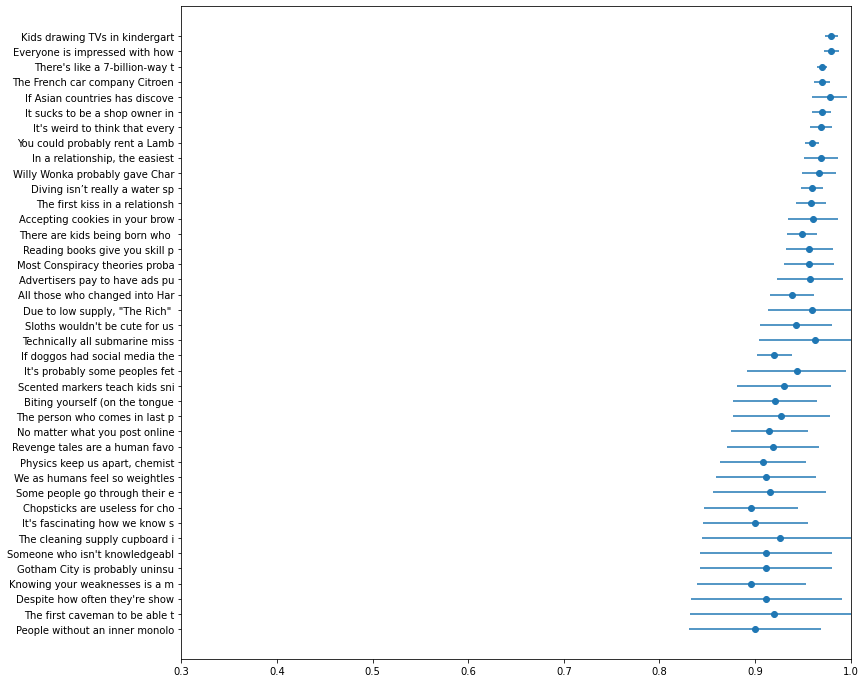

In [57]:
plt.figure(figsize = (12, 12))
r_order = order[::-1][-40:]

plt.errorbar(posterior_mean[r_order], np.arange(len(r_order)), 
             xerr = posterior_std_err[r_order], capsize = 0, fmt = 'o')
plt.xlim(0.3, 1)
plt.yticks(np.arange(len(r_order) - 1, -1, -1), map(lambda x:x[:30].replace("\n", ""), ordered_contents))

This visualization shows why sorting by posterior mean might be suboptimal. 

We are less certain about the posterior mean for some comments than others. In this case, it makes sense to sort by the lower bound of the 95% credible interval because this approach also factors in our uncertainty about the posterior estimates. 

The best submission should not only be one that ideally has a higher mean upvote ratio but also one that has the least uncertainty associated with this ratio. 